<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-3-second-method_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
%matplotlib inline

### Lectura de datos


In [3]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


La probabilidad de aprobar es  p = .66 y la de no es  f = 1 - p = .33



In [4]:
from sklearn.linear_model import LogisticRegression

independent_variables = ['HorasEstudio']
x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(C=10)
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))



coef [[2.67570118]]
intercept [-14.71626805]
[8.56748381e-05 1.24277552e-03 1.77499475e-02 2.07878309e-01
 7.92150806e-01 9.82253135e-01 9.98757444e-01 9.99914340e-01
 9.99994101e-01]
[0 0 0 0 1 1 1 1 1]


### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [5]:
rows = df.shape[0]
cols = df.shape[1]
scores = df[['HorasEstudio']].values
results = df['Aprueba'].values
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)

(9, 2)
(9, 1)


In [6]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [7]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Cost and Gradient at Initialization

In [8]:
theta_init = np.zeros((cols , 1))
cost, gradient = compute_cost(theta_init, X, y)
print(X[0:3,])

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)
print(theta_init)

[[1. 2.]
 [1. 3.]
 [1. 4.]]
Cost at initialization 0.6931471805599453
Gradient at initialization: [[-0.05555556]
 [-1.44444444]]
[[0.]
 [0.]]


### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [9]:
import math
def gradient_descent(x, y, theta, alpha, iterations,epsilon):
    costs = []
    prev = math.inf
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        costs.append(cost)
        if(abs(costs[i]-prev) < epsilon):
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = costs[i]
        theta -= (alpha * gradient)
    return theta, costs

In [10]:
theta, costs = gradient_descent(X, y, theta_init, 0.001, 2000000,1e-7)

Convergencia Alcanzada ! 403253  iteraciones


In [11]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-10.24075172]
 [  1.89255879]]
Resulting cost: 0.08861428522911761


Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-945701765.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("J$(\Theta)$")


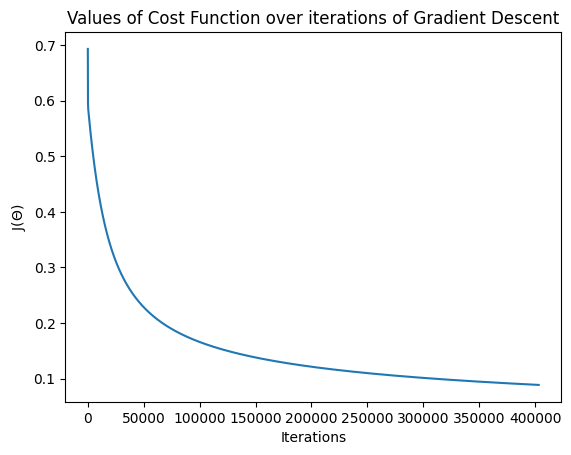

In [12]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J$(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");